<a href="https://colab.research.google.com/github/puneethegde72/Dashboard-and-infographic-creation/blob/main/IPL_data_visualization_and_infographic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# importing the dataset
df = pd.read_csv("matches.csv")
print(df.dtypes)

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object


In [3]:
# data cleansing
df.loc[df['team1'] == "Rising Pune Supergiants", 'team1'] = "Rising Pune Supergiant"
df.loc[df['team2'] == "Rising Pune Supergiants", 'team2'] = "Rising Pune Supergiant"
df.loc[df['team1'] == "Pune Warriors", 'team1'] = "Rising Pune Supergiant"
df.loc[df['team2'] == "Pune Warriors", 'team2'] = "Rising Pune Supergiant"
df.loc[df['team1'] == "Deccan Chargers", 'team1'] = "Sunrisers Hyderabad"
df.loc[df['team2'] == "Deccan Chargers", 'team2'] = "Sunrisers Hyderabad"
df.loc[df['winner'] == "Rising Pune Supergiants", 'winner'] = "Rising Pune Supergiant"
df.loc[df['winner'] == "Pune Warriors", 'winner'] = "Rising Pune Supergiant"
df.loc[df['winner'] == "Deccan Chargers", 'winner'] = "Sunrisers Hyderabad"
df.loc[df['winner'] == "Delhi Daredevils", 'winner'] = "Delhi Capitals"

# removing the rows == no result
df1 = df[df.result != "no result"]

In [4]:
# IPL titles won
index = ["IPL-2008", "IPL-2009", "IPL-2010", "IPL-2011", "IPL-2012", "IPL-2013", "IPL-2014", "IPL-2015",
         "IPL-2016", "IPL-2017", "IPL-2018", "IPL-2019"]
ipl_titles = ["RR", "SRH", "CSK", "CSK", "KKR", "MI", "KKR", "MI", "SRH", "MI", "CSK", "MI"]


In [5]:
count = pd.Series(ipl_titles).value_counts().sort_values(ascending=False)

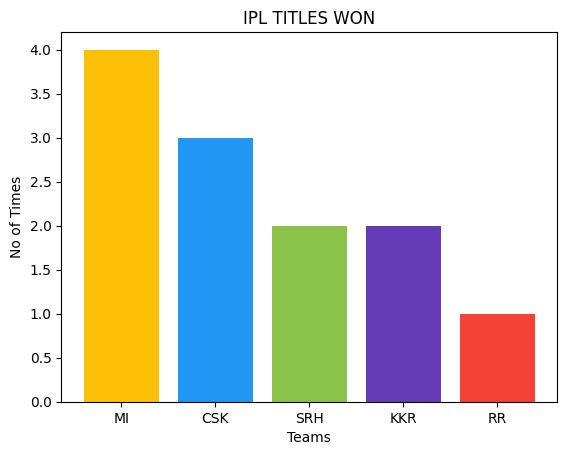

In [6]:
plt.bar(count.index, count.values, color=["#FFC107", "#2196F3", "#8BC34A", "#673AB7", "#F44336"])
plt.xlabel("Teams")
plt.ylabel("No of Times")
plt.title("IPL TITLES WON")
plt.show()

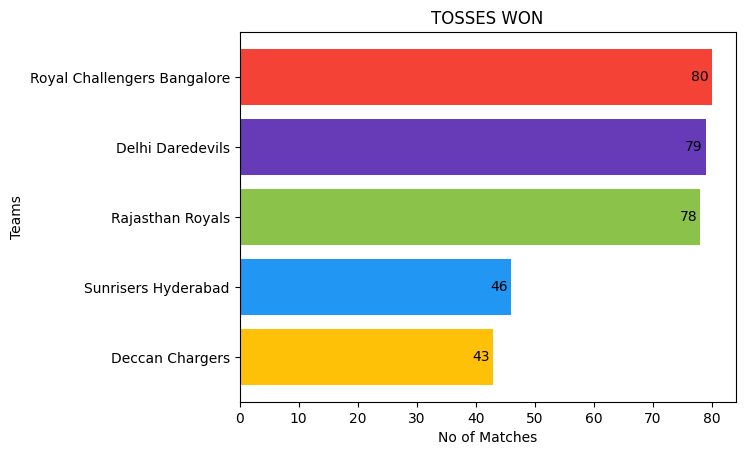

In [7]:
# maximum tosses won by top 5 teams
tw = df1.toss_winner.value_counts().sort_values(ascending=True)[6:11]
plt.barh(tw.index, tw.values, color=["#FFC107", "#2196F3", "#8BC34A", "#673AB7", "#F44336"])
plt.xlabel("No of Matches")
plt.ylabel("Teams")
plt.title("TOSSES WON")
for i, v in enumerate(tw.values):
    plt.text(v-3.5, i, str(v), color='black', fontsize=10, va='center')
plt.show()

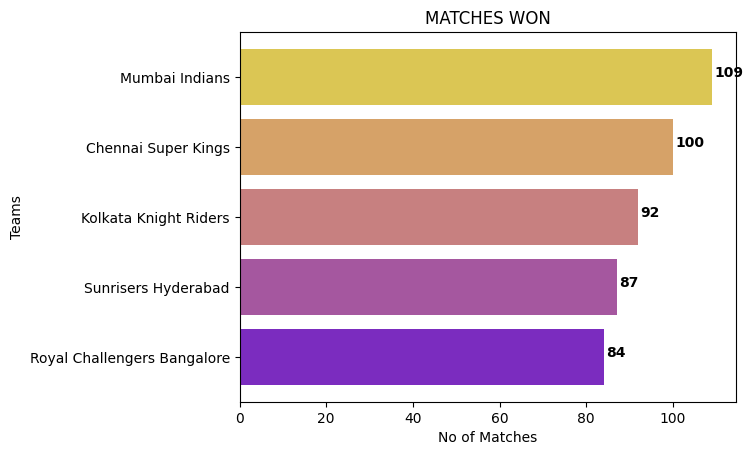

In [8]:
mw = dict(sorted(df1['winner'].value_counts().items(), key=lambda x: x[1], reverse=False)[6:11])
color_list = ['#7b2cbf', '#a5579f', '#c78080', '#d6a268', '#dbc654']
plt.barh(list(mw.keys()), list(mw.values()), color=color_list)
plt.xlabel("No of Matches")
plt.ylabel("Teams")
plt.title("MATCHES WON")
for i, v in enumerate(mw.values()):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='bold')
plt.show()

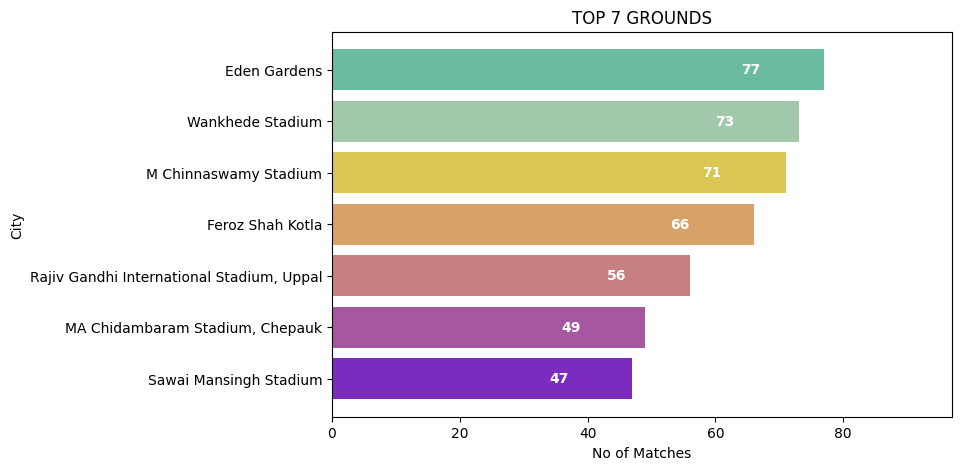

In [9]:
# Top 7 grounds hosted IPL matches
grd = df1['venue'].value_counts().sort_values().tail(7)

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#7b2cbf', '#a5579f', '#c78080', '#d6a268', '#dbc654', '#a2c8ab', '#6bbba1']
ax.barh(grd.index, grd.values, color=colors)
ax.set_xlabel("No of Matches")
ax.set_ylabel("City")
ax.set_title("TOP 7 GROUNDS")
ax.set_xlim([0, max(grd.values)+20])
for i, v in enumerate(grd.values):
    ax.text(v-10, i, str(v), color='white', fontweight='bold', ha='right', va='center')

plt.show()

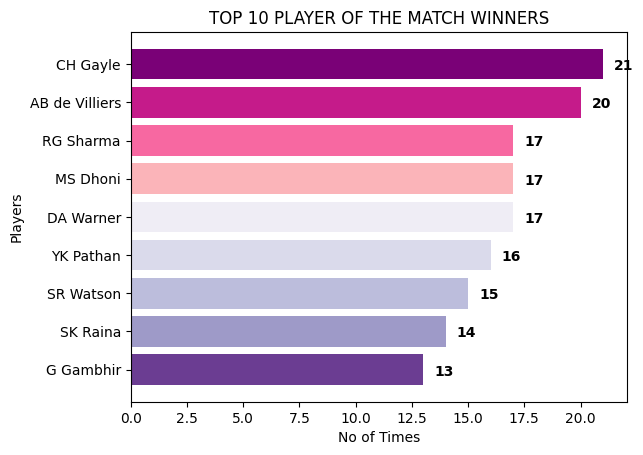

In [14]:
#top 10 player of the match
tpl = dict(df1['player_of_match'].value_counts().sort_values(ascending=True)[217:227])
plt.barh(list(tpl.keys()), list(tpl.values()), color=['#6b3d92', '#9e9ac8', '#bcbddc', '#dadaeb', '#efedf5', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177', '#49006a'])
plt.xlabel("No of Times")
plt.ylabel("Players")
plt.title("TOP 10 PLAYER OF THE MATCH WINNERS")
for i, v in enumerate(tpl.values()):
    plt.text(v + 0.5, i - 0.15, str(v), color='black', fontweight='bold')


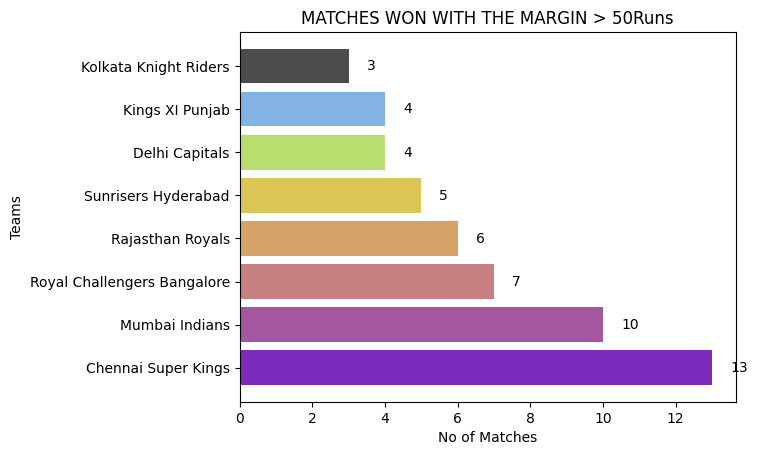

In [16]:
# which team won most watches with the margin > 50runs
ch = df1[df1['win_by_runs'] > 50]
wbr = ch['winner'].value_counts().sort_values(ascending=False)[:8]
plt.barh(wbr.index, wbr.values, color=['#7b2cbf', '#a5579f', '#c78080', '#d6a268', '#dbc654', '#b8de6f', '#82b3e4', '#4c4c4c'])
plt.title("MATCHES WON WITH THE MARGIN > 50Runs")
plt.xlabel("No of Matches")
plt.ylabel("Teams")
for i, v in enumerate(wbr.values):
    plt.text(v+0.5, i, str(v), color='black', va="center")



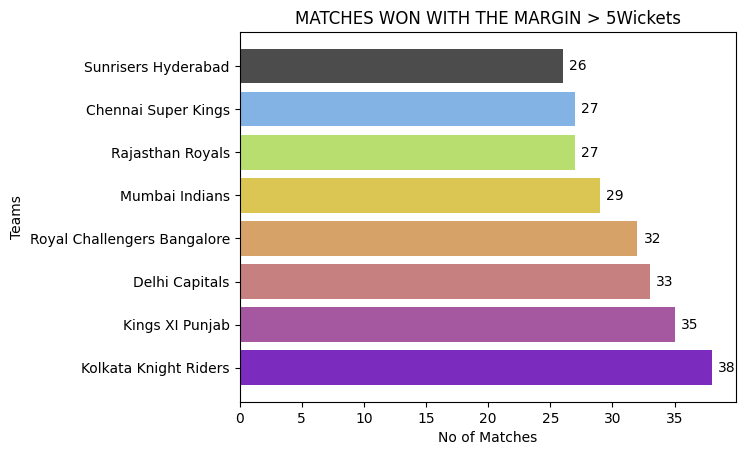

In [17]:
# margin > 5wickets
ch1 = df1[df1['win_by_wickets'] > 5]
wbw = ch1['winner'].value_counts().sort_values(ascending=False)[:8]
plt.barh(wbw.index, wbw.values, color=['#7b2cbf', '#a5579f', '#c78080', '#d6a268', '#dbc654', '#b8de6f', '#82b3e4', '#4c4c4c'])
plt.title("MATCHES WON WITH THE MARGIN > 5Wickets")
plt.xlabel("No of Matches")
plt.ylabel("Teams")
for i, v in enumerate(wbw.values):
    plt.text(v+0.5, i, str(v), color='black', va="center")